In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/home/lexie/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [4]:
# Read the data

soi = pd.read_csv('soi.csv')
soi.describe()

,soi
count,1891.000000
mean,-0.043353
std,1.133221
min,-4.340000
25%,-0.780000
50%,-0.020000
75%,0.750000
max,4.070000


# 1. Plot the SOI Time Series
Create a line plot of the El Niño 3.4 sea surface temperature over time. Use appropriate labels and a clear title for the plot.

In [5]:
#TODO Roger

# 2. Check for Stationarity
Examine the time series graphically to determine if it is stationary. Discuss any observable features of the series.

In [6]:
#TODO Jackson

# 3. Autocorrelation and Partial Autocorrelation
Compute and plot the autocorrelation and partial autocorrelation functions for the SOI time series. Discuss any significant lags.

In [10]:
import pandas as pd
from statsmodels.tsa.stattools import acf, pacf

# Read data
df = pd.read_csv('soi.csv')
time_series = df['soi']

# Compute the autocorrelation values using acf
# fft=True uses the FFT method to calculate the ACF, which is faster for large data sets.
autocorrelation_values = acf(time_series, fft=True)

# Compute the partial autocorrelation values using pacf
# The method can be 'ywunbiased' (Yule-Walker), 'ywmle' (Yule-Walker without bias correction),
# 'ols' (Ordinary Least Squares), or 'ld' (Levinson-Durbin).
partial_autocorrelation_values = pacf(time_series, method='ywm')

# Print the results
print("Autocorrelation Values:\n", autocorrelation_values)
print("Partial Autocorrelation Values:\n", partial_autocorrelation_values)


Autocorrelation Values:
 [ 1.          0.59613852  0.49886345  0.43164739  0.38384786  0.33243036
  0.29104274  0.23720813  0.20361633  0.16623001  0.10160019  0.04510102
  0.027809   -0.03164769 -0.08482638 -0.11186089 -0.09145059 -0.08446238
 -0.10908677 -0.12333288 -0.1076037  -0.09463945 -0.08156143 -0.08170341
 -0.10624255 -0.06305629 -0.06334102 -0.03246728 -0.00965525 -0.02095627
 -0.03305569 -0.03087295 -0.03697704]
Partial Autocorrelation Values:
 [ 1.          0.59613852  0.22258474  0.1105944   0.07109839  0.02709865
  0.01653323 -0.02011915 -0.00250634 -0.01409731 -0.06791005 -0.0671351
 -0.00709699 -0.072499   -0.07606728 -0.0362824   0.04549948  0.03240089
 -0.02758957 -0.01881787  0.02375514  0.01806625  0.01867489 -0.00404344
 -0.06209804  0.03840375 -0.01412781  0.03587897  0.02116211 -0.04288385
 -0.03704962 -0.01020209 -0.0221508 ]


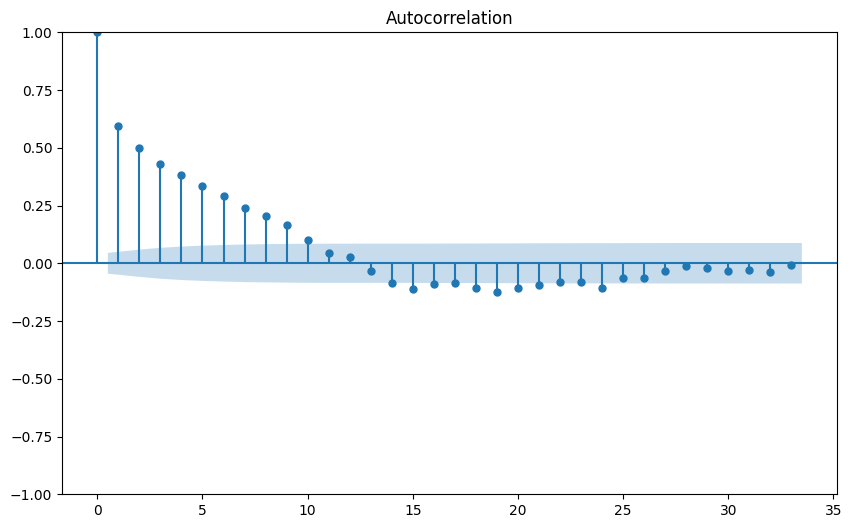

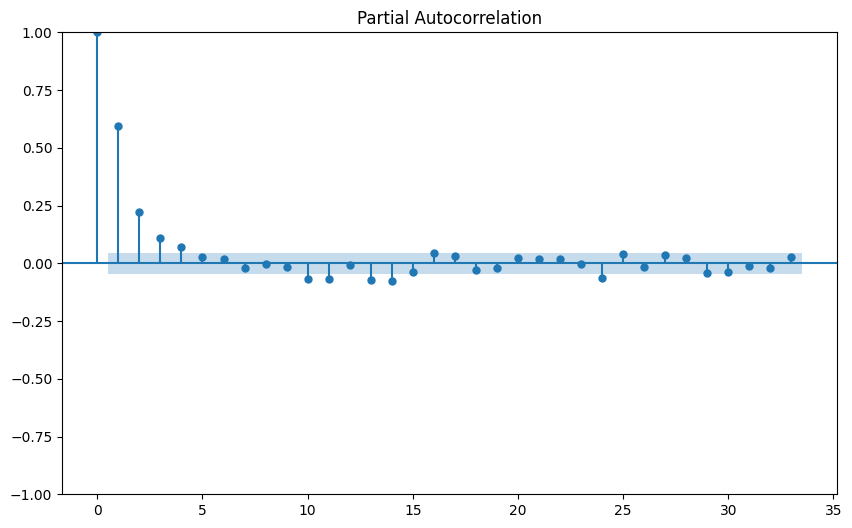

In [9]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plotting the correlogram / Autocorrelation plot
fig, ax = plt.subplots(figsize=(10, 6))
plot_acf(time_series, ax=ax)
plt.show()

# Plotting the Partial Autocorrelation plot
fig, ax = plt.subplots(figsize=(10, 6))
plot_pacf(time_series, ax=ax, method='ywm')
plt.show()


#### Analysis of the results

>- Autocorrelation Values: \
> The autocorrelation values  decreases gradually, which suggests an AutoRegressive (AR) process.

>- Partial Autocorrelation Values: \
> The PACF shows a significant initial lag, and then drops to lower values that oscillate around zero. The significant initial value followed by a decrease also suggests an AR component.

##### Interpretation and Model Suggestion: 

> The significant value at the first lag in Partial Autocorrelation Values and the gradual decay in Autocorrelation Values suggest an AR process.

**AR (AutoRegressive) Process:** The correlogram analysis points toward an AR process. The Autocorrelation Values gradual decay and the Partial Autocorrelation Values initial significant value support the presence of an AR component. However, the exact order of the AR process is not clearly indicated by a sharp cutoff in the Partial Autocorrelation Value; four lags seem to be significant, but third and fourth ones are pretty close to uncorrelated zone, because of that an AR(2) or AR(1) look like a better first approach.

**MA (Moving Average) Component:** The absence of a sharp cutoff in the Autocorrelation Values and the fluctuating but generally insignificant values in the Partial Autocorrelation Value after the first few lags suggest that a pure Moving Average (MA) process is less likely the sole component.

**ARIMA:** Given the gradual decay in ACF and the significant initial lag in PACF, an ARIMA model might be appropriate too.


# 4. Prediction
Divide the dataset into training and testing sets, reserving 30% of the total data for testing. Use the training set to build a time series prediction model. You are free to choose an appropriate model (e.g., ARIMA, SARIMA). Provide a plot comparing the actual values with the predicted values on the testing set.

In [8]:
#TODO Lachi